# lesson 2

概要： 卷积操作 卷积核 角点 sift 

### 卷积：  
1，对应位置相乘然后相加获得结果  
2，一般二维卷积用的比较多  
3，数学上其实叫互相关，数学意义上的卷积需要数据反过来，错误没有被纠正，因为不影响  
4，通道不做卷积，通道拆开分别做卷积，再合并  

### 图像求导：  
1，是关于位置的导数，灰度值关于位置的函数求导  
2，求导方法，后一个值减去前一个值  
3，Ix = I(x + 1) - I(x)  
4，求导相当于对图像做了一个 以卷积核（-1，1）做了一次卷积操作  
5，Ix = I(x+1)-I(x-1) / 2 卷积核(-1, 0, 1) 卷积核名称：prewitt算子  
6，sobel算子 （一阶导算子）   
-1 0 1  
-2 0 2  
-1 0 1  

### 卷积功能一：边缘检测    
1，一阶导 一维算子 x方向 （-1， 0， 1）  
-1 0 1  
-2 0 2  
-1 0 1  
2，二阶导 一维算子 x方向 （1， -2， 1）  
0  1  0  
1 -4  1  
0  1  0  
3，一阶导含义：检测边缘，在边缘处有粗边 （提取边缘）   
4，二阶导含义：更精细，对噪音敏感，有双边效应 （提取边缘对边缘）   

### 卷积功能二：滚动平均  
1，滚动平均：图像平滑、降噪、模糊  
2，高斯卷积核：标准差 1  
1,2,1  
2,4,2 * 1/16(保证均值不变)  
1,2,1  



In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def my_show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [70]:
img = cv2.imread('/Users/sty/PycharmProjects/My_world/CNN_CV/Lesson_1/Data/lenna.jpg', 1)

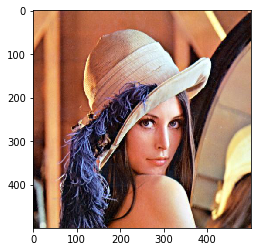

In [16]:
my_show(img)

### 高斯核（高斯模糊）

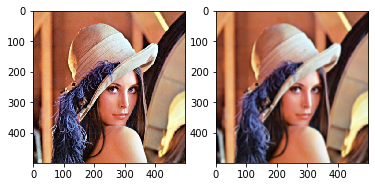

In [7]:
g_img = cv2.GaussianBlur(img,(11,11),2)
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(g_img)

In [8]:
kernel_1d = cv2.getGaussianKernel(11,2)

In [9]:
kernel_1d

array([[0.00881223],
       [0.02714358],
       [0.06511406],
       [0.12164907],
       [0.17699836],
       [0.20056541],
       [0.17699836],
       [0.12164907],
       [0.06511406],
       [0.02714358],
       [0.00881223]])

In [10]:
g1_img = cv2.sepFilter2D(img, -1, kernel_1d, kernel_1d)

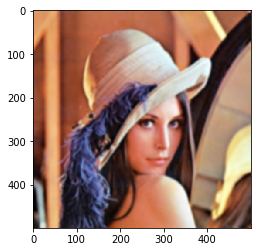

In [11]:
my_show(g1_img)

### laplacian 二阶求导

In [13]:
kernel_2d = np.array([[0,1,0],[1,-4,1],[0,1,0]])

In [14]:
lap_img = cv2.filter2D(img, -1, kernel_2d)

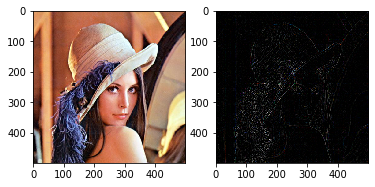

In [15]:
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(lap_img)

In [17]:
kernel_2d_2 = np.array([[1,1,1],[1,-8,1],[1,1,1]])
lap_img_2 = cv2.filter2D(img, -1, kernel_2d_2)

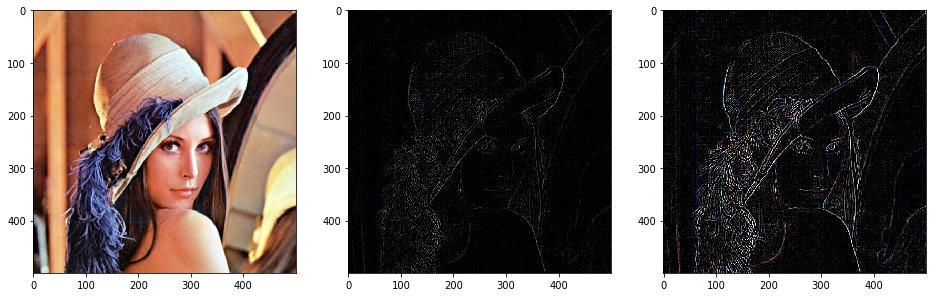

In [22]:
plt.figure(figsize=(16,8))
plt.subplot(131)
my_show(img) 
plt.subplot(132)
my_show(lap_img)
plt.subplot(133)
my_show(lap_img_2)

### 图像锐化

In [23]:
kernel_2d_2

array([[ 1,  1,  1],
       [ 1, -8,  1],
       [ 1,  1,  1]])

In [25]:
kernel_strong = np.array([[1,1,1],[1,-7,1],[1,1,1]])  # 算子中间+1（二阶导图像+原图）=边缘锐化

In [26]:
kernel_normal = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

In [28]:
R_s = cv2.filter2D(img, -1, kernel_strong)

In [29]:
R_n = cv2.filter2D(img, -1, kernel_normal)

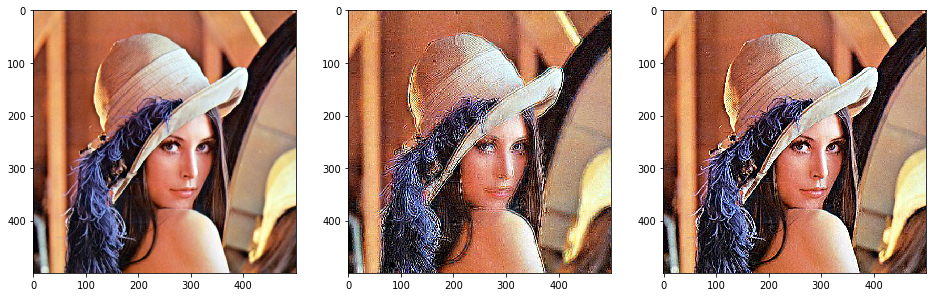

In [30]:
plt.figure(figsize=(16,8))
plt.subplot(131)
my_show(img) 
plt.subplot(132)
my_show(R_s)
plt.subplot(133)
my_show(R_n)

### sobel （一阶算子）

In [40]:
y_kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

In [41]:
sy_img = cv2.filter2D(img, -1, y_kernel)

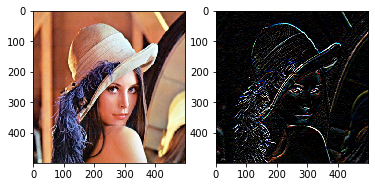

In [42]:
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(sy_img)

### medianblur

In [43]:
md_img = cv2.medianBlur(img, 7)

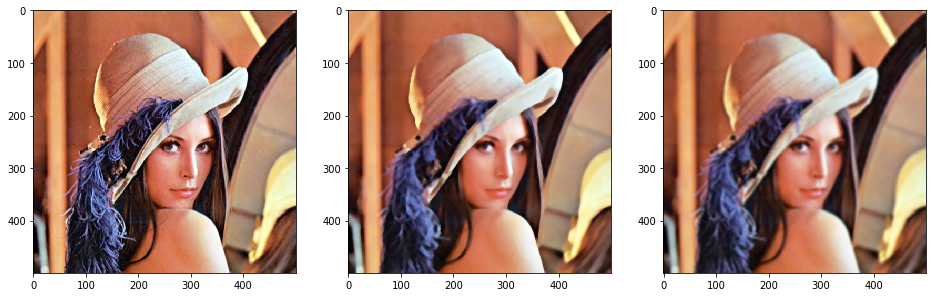

In [45]:
plt.figure(figsize=(16,8))
plt.subplot(131)
my_show(img) 
plt.subplot(132)
my_show(md_img)
plt.subplot(133)
my_show(g_img)

In [46]:
noise_img = cv2.imread('/Users/sty/PycharmProjects/My_world/CNN_CV/Lesson_2/Data/noise_lenna.jpg')

In [56]:
md_n_img = cv2.medianBlur(noise_img, 3)
g_n_img = cv2.GaussianBlur(noise_img, (3,3), 10)

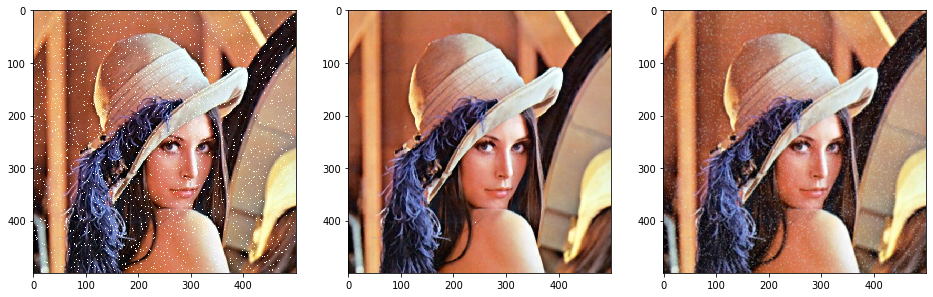

In [57]:
plt.figure(figsize=(16,8))
plt.subplot(131)
my_show(noise_img) 
plt.subplot(132)
my_show(md_n_img)
plt.subplot(133)
my_show(g_n_img)

### 特征点（中级阶段）
 
1，边缘信息、角点信息（有规律对像素堆积）   
2，应用：拼接、分类、重构  

特征点选择：  
1，信息点够多（边、角） 

角点： 
1，选择一个窗口  
2，平坦区域窗口移动时信息不变  
3，边：窗口沿边方向移动，信息差不变   
4，角：任何方向移动，信息变化比较大  

#### Harris Corner 算法

差异： $ E = \sum_{(x,y)\subseteq w}{}{[I(x + \delta x, y + \delta y) - I(x, y)] ^ 2} $  
要求： 不管 $ \delta x \delta y $ 怎么变， E都要最大， 求x, y  
核心： $ R = \lambda_1*\lambda_2 - k(\lambda_1 + \lambda_2) $ k自己定的（0.04～0.06）左右   
阈值： R > threshold 我们认定R为特征点

步骤：  
1，一定要灰度图上取点  
2，api:cv2.cornerHarris(img,w[size],k) w:窗口大小  
3，设阈值，一般为 最大值 * 0.03  
4，根据阈值，大于阈值 为角点位置（可修改颜色在原图上现实）  

In [109]:
def my_Harris_corner(img, t):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_harris = cv2.cornerHarris(img_gray, 2, 3, 0.03) # 窗口为2*3 k值为0.03
    threshold = np.max(img_harris) * t # t为最大值的百分比
    img_h = img.copy()
    img_h[img_harris > threshold] = [0,255,255]
    return img_h
    

In [110]:
img_corner = cv2.imread('/Users/sty/PycharmProjects/My_world/CNN_CV/Lesson_2/Data/test_corner.jpg')

In [111]:
img_H = my_Harris_corner(img, 0.01)
img_corner_H = my_Harris_corner(img_corner, 0.01)

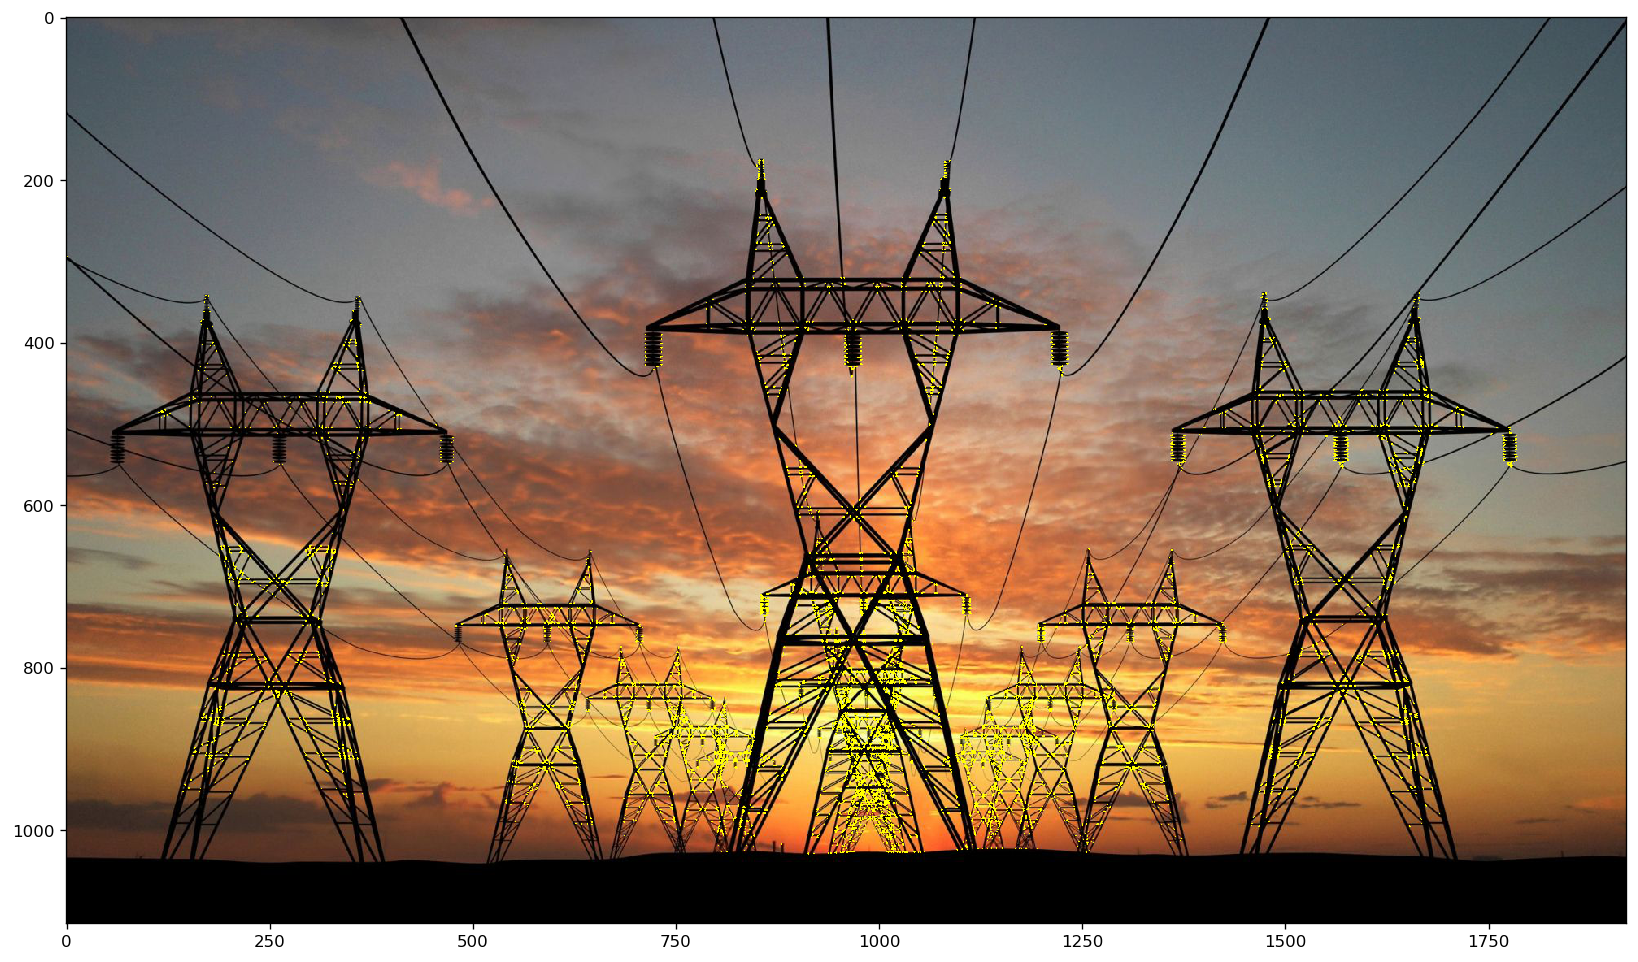

In [112]:
plt.figure(figsize=(20,10), dpi=120)
my_show(img_corner_H)

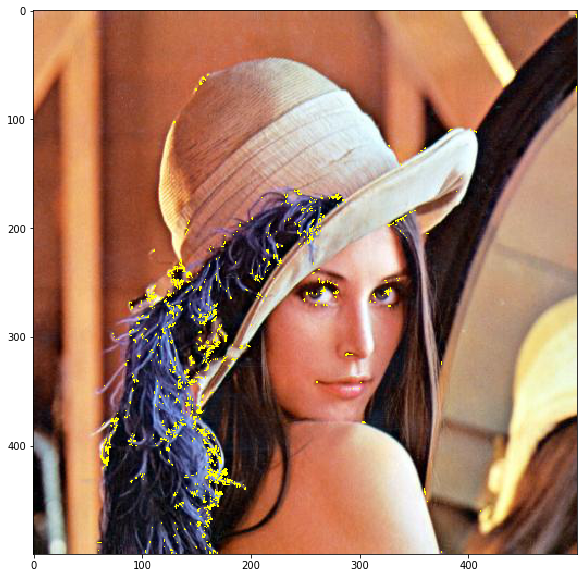

In [113]:
plt.figure(figsize=(10,10))
my_show(img_H)

 ### SIFT  
 
 1，全称：尺度不变的特征变换   
 2，cv版本 3.4.2 之前才有   
 
 步骤：   
 1，生成尺度空间（DoG）  
 2，尺度空间的极值点的检测  
 3，精确定位关键点的位置  
 4，消除边缘效应  
 5，指定方向  
 6，特征点描述  
 
 步骤一：高斯差分金字塔（DoG）  
 1，高斯模糊来模拟尺度变化  
 2，尺度变换，高斯金字塔，每一组往上小一半（偶数行偶数列不要，只要奇数行奇数列）  
 3，一共有n个组，每个组往上尺度小一半（例如：octave1，octave2 。。。 ）  
 4，每个组有m张图（每张图都做了高斯模糊，层层递进，标准差越来越大），每组两两做相减做差分（会少一张图） m>2 为了找极值  
 5，做完差分就形成DoG  
 
 步骤二：极值点选择（在DoG找极值）   
 1，极值：在每组中，从第二张图开始，中间那张图对比上下两种图（在27个像素点中比较），找到最大值或者最小值（会少两张图）    
 
 步骤三：用泰勒展开找到更精确的极值点    
 1，因为是离散点所有要找到更精确的极值点    
 排除条件：   
 1，如果 D（x）太小，将其剔除    
 2，$\delta x$ 小于 T/n T（超参）n（图片张数） 停止迭代    
 
 步骤四：去除边缘，找到关键点   
 1，目前找出来的极值点，可能是边缘，也可能是角点，所以要删除边缘点   
 2，要找到富有信息的keypoints，类似寻找角点的方法   
 3，其中 $\lambda_1$ 或者 $\lambda_2$ 其中一个值非常大，就为边缘点 （两个值都很大为我们需要的角点）   
 4，$ (\lambda_1 + \lambda_2) ^ 2 / \lambda_1\lambda_2 < \theta $ （ $\theta = (a + 1) ^2 / a $ （a=10阈值设定））  
 
 步骤五：指定方向   
 1，找到关键点后，在关键点为圆心画个圆，   
 2，划定0-360度，分为10个区域，直方统计，计算圈内像素点落在那个角度区域    
 3，最高的主方向（x轴方向），第二高辅方向（如果辅方向大于主方向的80%，则存在辅方向）  
 
 步骤六：关键点描述  
 1，旋转不变性，x轴方向为主方向  
 2，构建一个更大的区域（4 * 4 子区域），每个子区域做直方统计（8个方向）  
 3，每个关键点，我们都有4 * 4 * 8 = 128维度向量来描述它  
 4，128维向量做归一化（除以模长） 

In [114]:
cv2.__version__

'3.4.2'

In [116]:
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(img)

In [119]:
len(kp)

1327

In [128]:
kp_1, des = sift.compute(img, kp)

In [132]:
des.shape

(1327, 128)

In [135]:
img_sift = cv2.drawKeypoints(img, kp_1, outImage=np.array([]), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

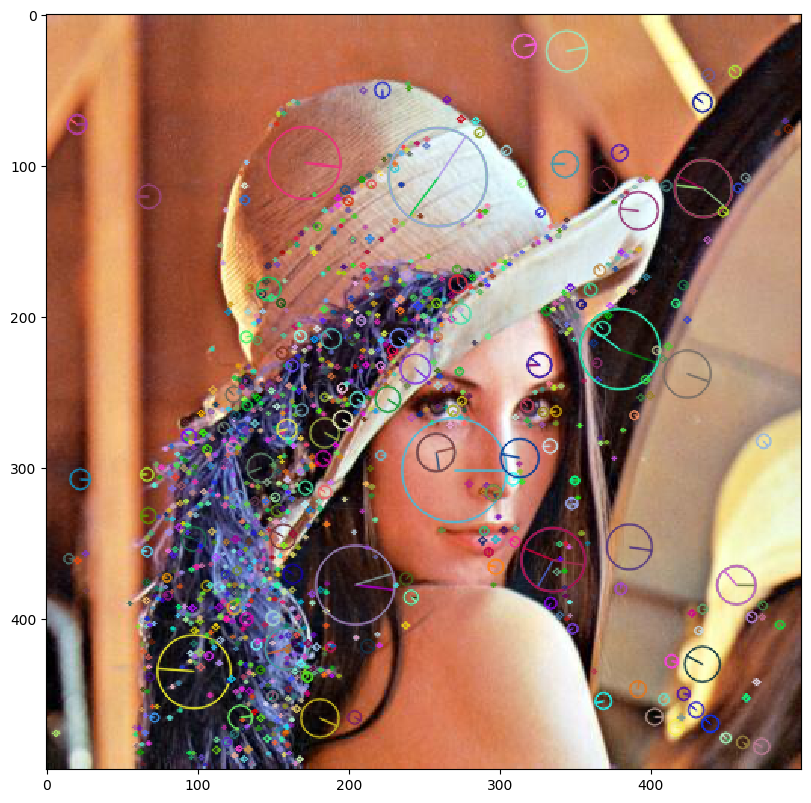

In [136]:
plt.figure(figsize=(10,10), dpi=100)
my_show(img_sift)